# ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import adfuller              #用來做平穩性檢驗
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose     #用來作季節性分析
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 0.讀取資料

In [3]:
file ="../Dataset/monthly_csv.csv" #讀入每月的黃金價格
data=pd.read_csv(file, index_col="Date")    #把檔案中Data的那個Column當成index
data
print(type(data))
Data_Arima =  data['Price']
print(type(Data_Arima))
Data_Arima

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Date
1950-01      34.730
1950-02      34.730
1950-03      34.730
1950-04      34.730
1950-05      34.730
             ...   
2020-03    1593.764
2020-04    1680.030
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, Length: 847, dtype: float64

## 1.了解資料

### 1-1畫出資料曲線

Text(0, 0.5, 'Price')

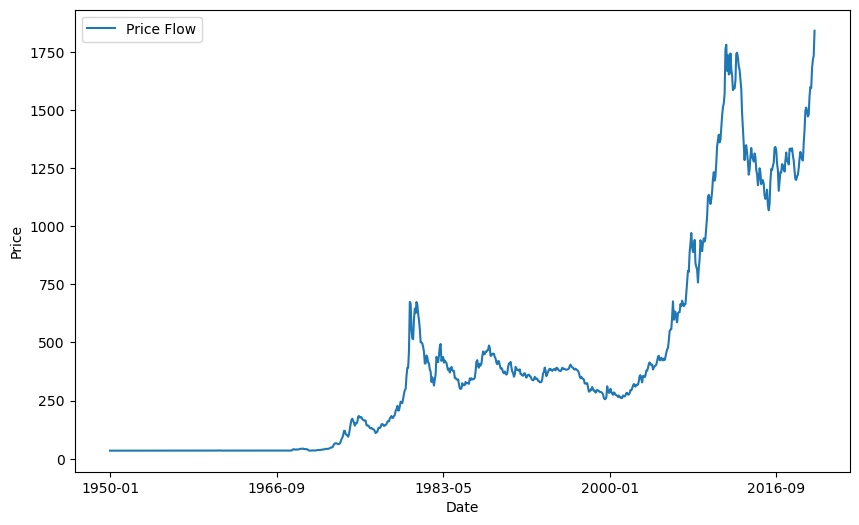

In [4]:
Data_Arima_Curve = Data_Arima.plot(figsize=(10,6), label="Price Flow")
Data_Arima_Curve.legend()
plt.ylabel("Price")

### 1-2對資料作季節性分析，model選用 = multiplicative

In [5]:
Sequence_Multi = seasonal_decompose(Data_Arima, model="multiplicative", period=12)    #進行季節性分析，這邊的週期用一年為一個循環
#seasonal_decompose會有4個輸出，observed, trend, seasonal, residual這四種
#用multiplicative的話，y(t) = Level * Trend * Seasonality * Noise

Date
1950-01      34.730
1950-02      34.730
1950-03      34.730
1950-04      34.730
1950-05      34.730
             ...   
2020-03    1593.764
2020-04    1680.030
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, Length: 847, dtype: float64

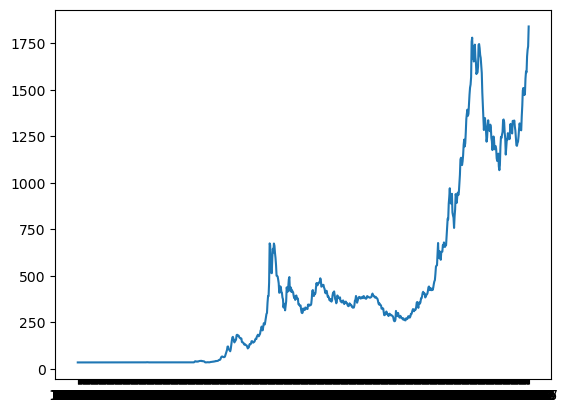

In [6]:
plt.plot(Sequence_Multi.observed)
Sequence_Multi.observed    #Observed就是原始資料

Date
1950-01   NaN
1950-02   NaN
1950-03   NaN
1950-04   NaN
1950-05   NaN
           ..
2020-03   NaN
2020-04   NaN
2020-05   NaN
2020-06   NaN
2020-07   NaN
Name: trend, Length: 847, dtype: float64

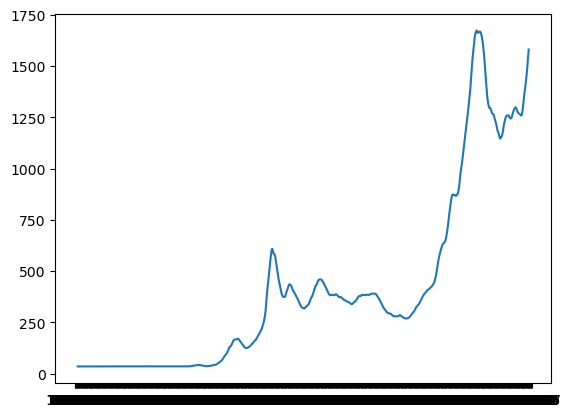

In [7]:
plt.plot(Sequence_Multi.trend)
Sequence_Multi.trend     
#trend是指序列中的趨勢，因為我們選用的是每12個月為一個週期，所以這邊看到的都是沒有變化的，所以是NaN

Date
1950-01    1.005545
1950-02    1.010676
1950-03    1.003779
1950-04    1.000686
1950-05    1.001294
             ...   
2020-03    1.003779
2020-04    1.000686
2020-05    1.001294
2020-06    0.998760
2020-07    0.994933
Name: seasonal, Length: 847, dtype: float64

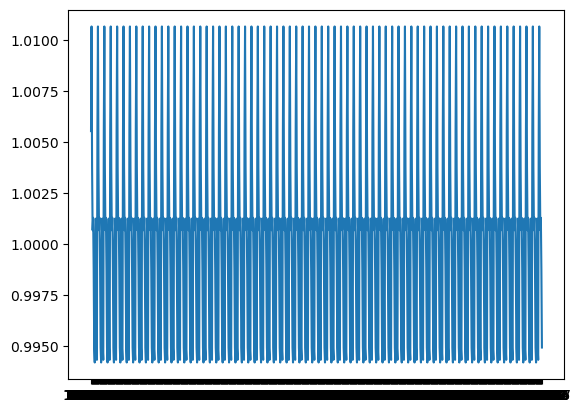

In [8]:
plt.plot(Sequence_Multi.seasonal)
Sequence_Multi.seasonal     #seasonal是指序列中原曲線減掉Trand的值

Date
1950-01    1.005545
1950-02    1.010676
1950-03    1.003779
1950-04    1.000686
1950-05    1.001294
             ...   
2020-03    1.003779
2020-04    1.000686
2020-05    1.001294
2020-06    0.998760
2020-07    0.994933
Name: seasonal, Length: 847, dtype: float64

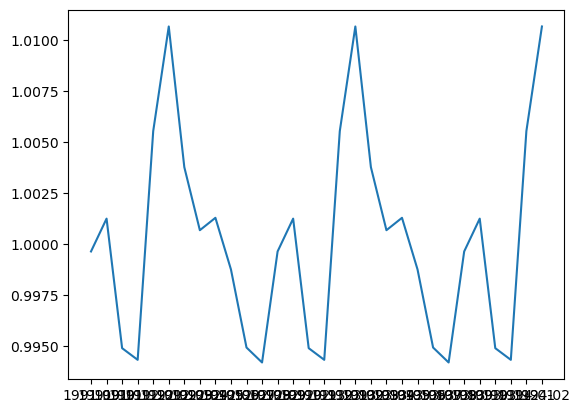

In [9]:
plt.plot(Sequence_Multi.seasonal[500:530])
Sequence_Multi.seasonal     #seasonal是指序列中原曲線減掉Trand的值

Date
1950-01   NaN
1950-02   NaN
1950-03   NaN
1950-04   NaN
1950-05   NaN
           ..
2020-03   NaN
2020-04   NaN
2020-05   NaN
2020-06   NaN
2020-07   NaN
Name: resid, Length: 847, dtype: float64

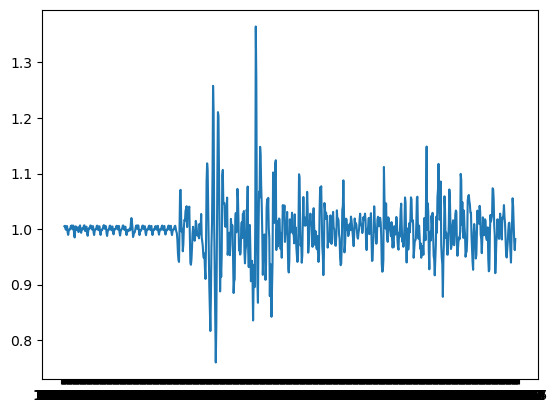

In [10]:
plt.plot(Sequence_Multi.resid)
Sequence_Multi.resid    #resid就是residual，極微小的差異

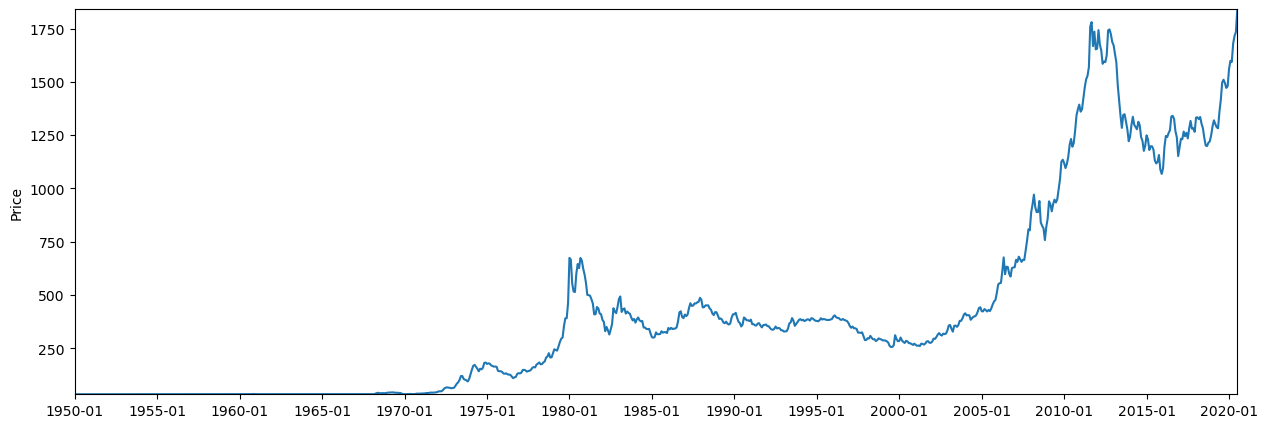

In [11]:
#來看看Sequence_Multi.observed的曲線，
plt.figure(figsize=(15,5))
plt.plot(Sequence_Multi.observed)
plt.ylabel("Price")
plt.xticks(Data_Arima.index[::60], rotation=0)      #x軸刻度每隔五年(60個月)顯示一次
plt.margins(0)

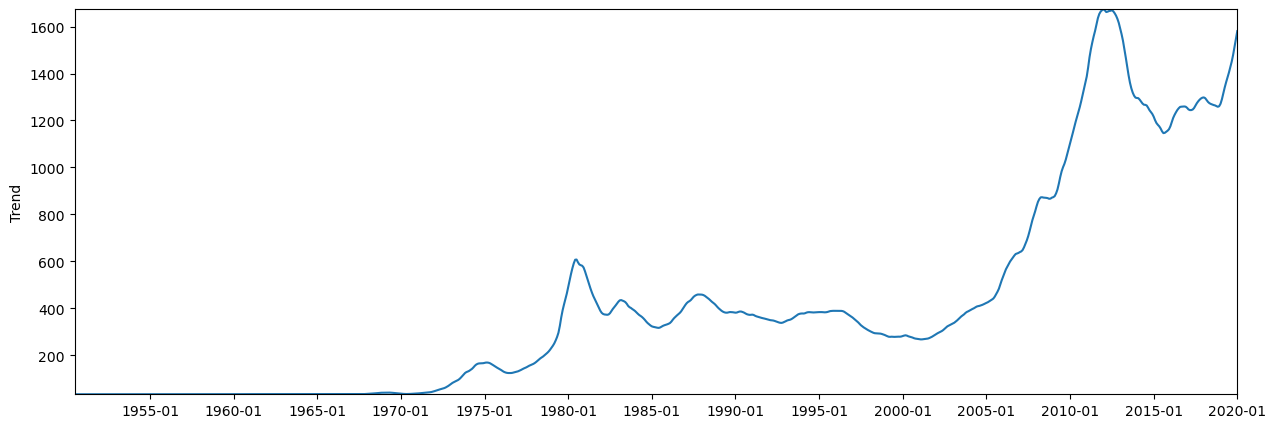

In [12]:
#來看看Sequence_Multi.trend的曲線，
plt.figure(figsize=(15,5))
plt.plot(Sequence_Multi.trend)
plt.ylabel("Trend")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

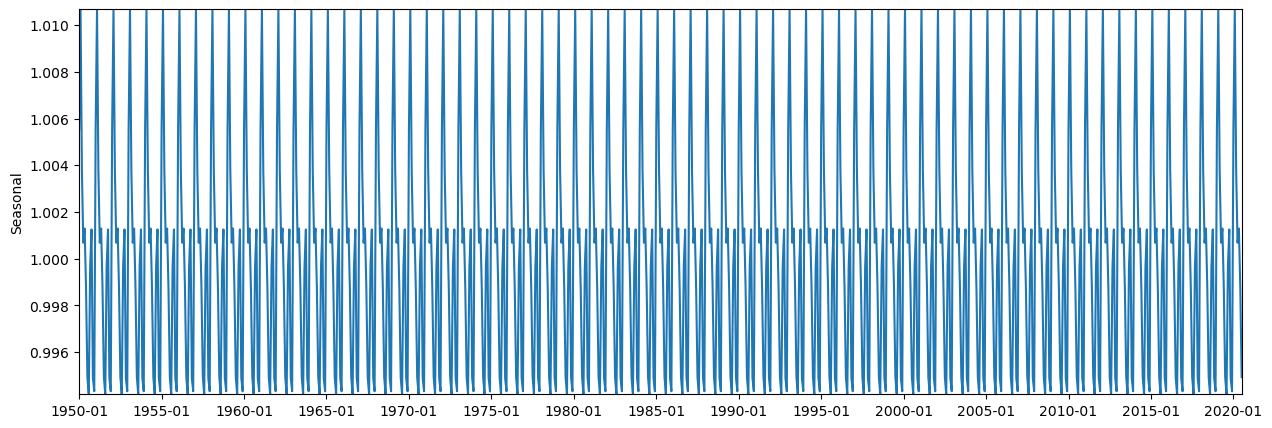

In [13]:
#來看看Sequence_Multi.seasona的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Multi.seasonal)
plt.ylabel("Seasonal")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

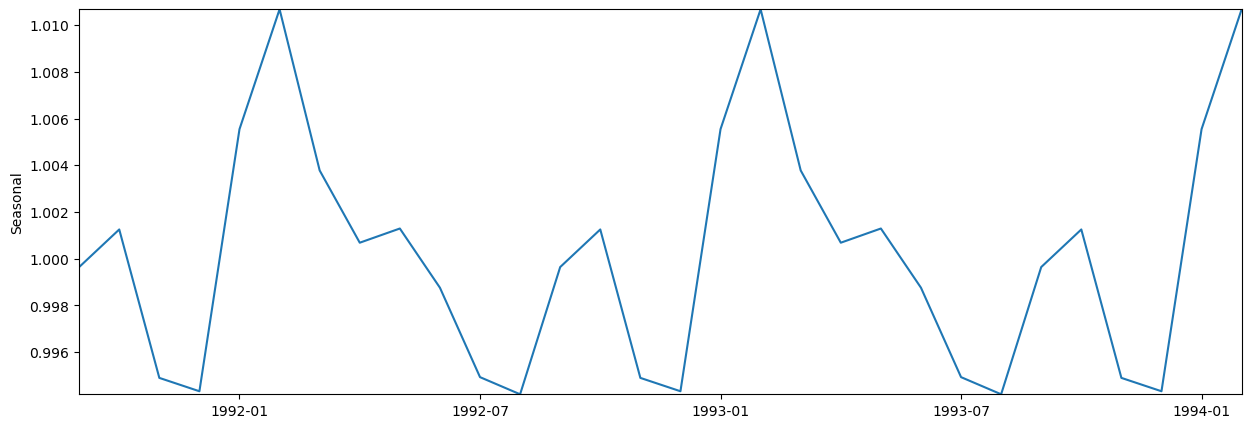

In [14]:
#來看看Sequence_Multi.seasona的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Multi.seasonal[500:530])
plt.ylabel("Seasonal")
plt.xticks(Data_Arima.index[::6], rotation=0)
plt.margins(0)

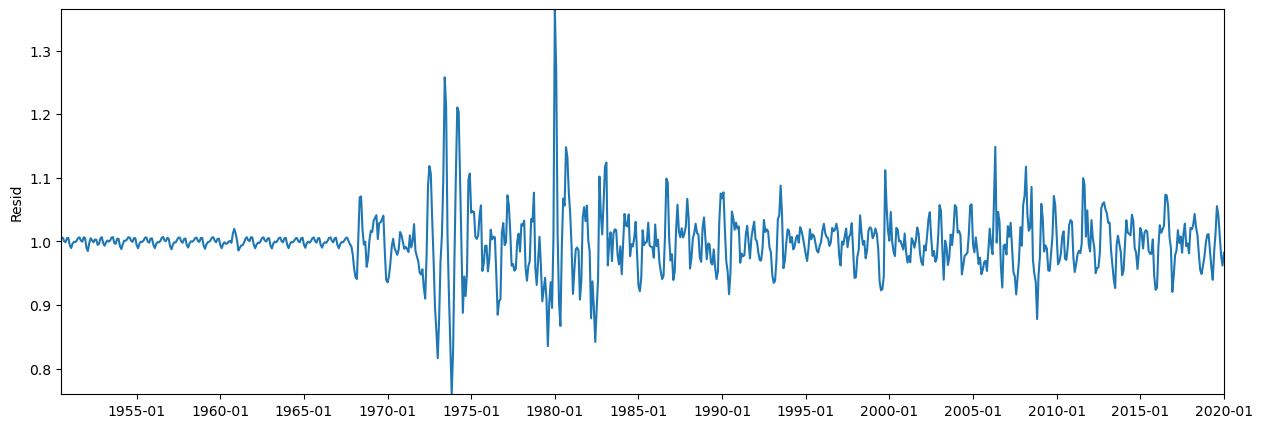

In [15]:
#來看看Sequence_Multi.resid的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Multi.resid);
plt.ylabel("Resid")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

### 1-2對資料作季節性分析，model選用 = additive

In [16]:
Sequence_Add = seasonal_decompose(Data_Arima, model="additive", period=12)
#seasonal_decompose會有4個輸出，observed, trend, seasonal, residual這四種
#用additive的話，y(t) = Level + Trend + Seasonality + Noise

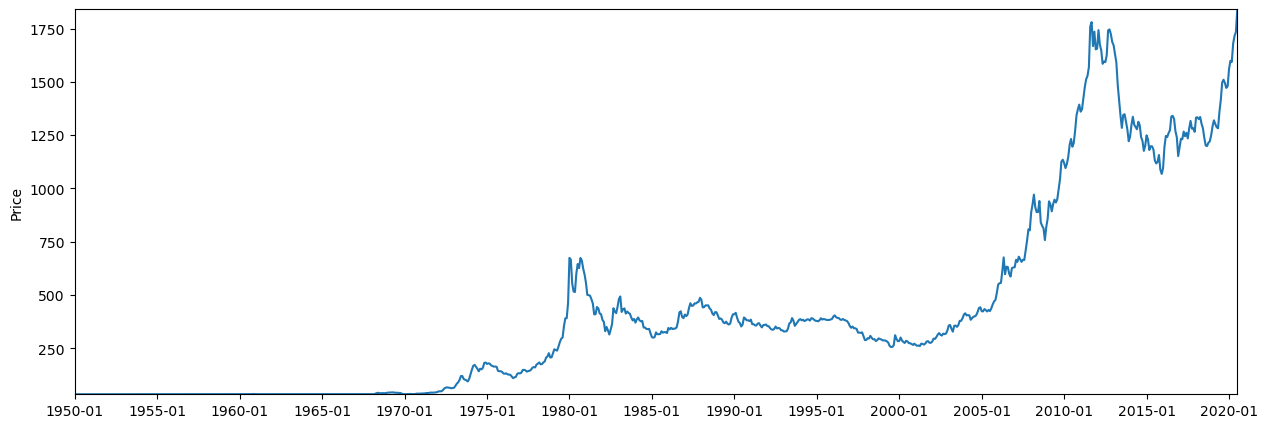

In [17]:
#來看看Sequence_Add.observed的曲線，
plt.figure(figsize=(15,5))
plt.plot(Sequence_Add.observed)
plt.ylabel("Price")
plt.xticks(Data_Arima.index[::60], rotation=0)      #x軸刻度每隔五年顯示一次
plt.margins(0)

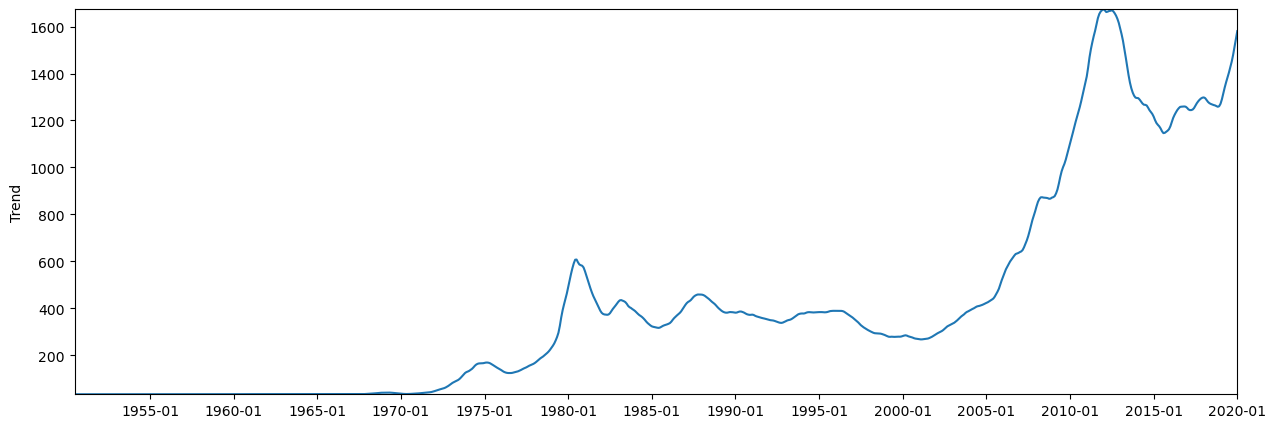

In [18]:
#來看看Sequence_Add.trend的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Add.trend)
plt.ylabel("Trend")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

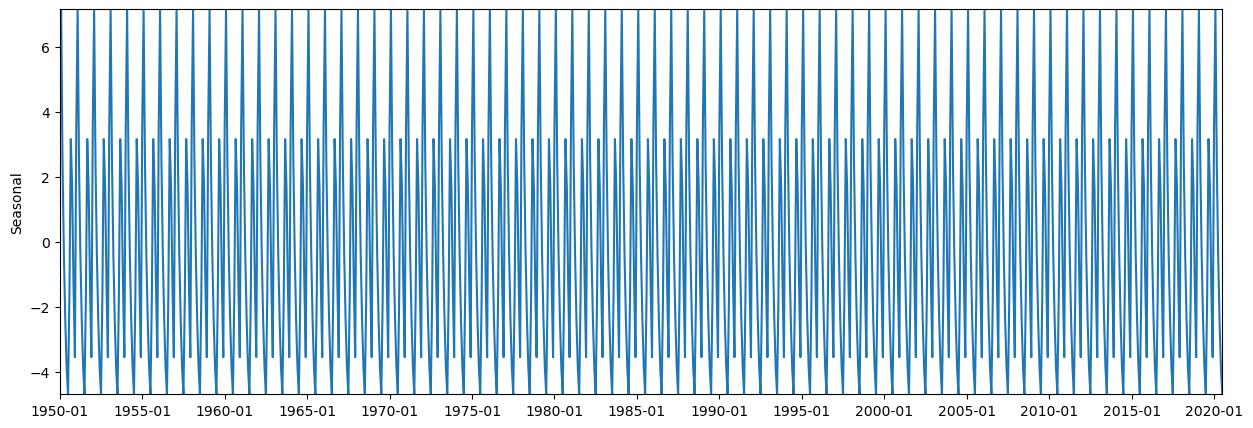

In [19]:
#來看看Sequence_Add.seasonal的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Add.seasonal)
plt.ylabel("Seasonal")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

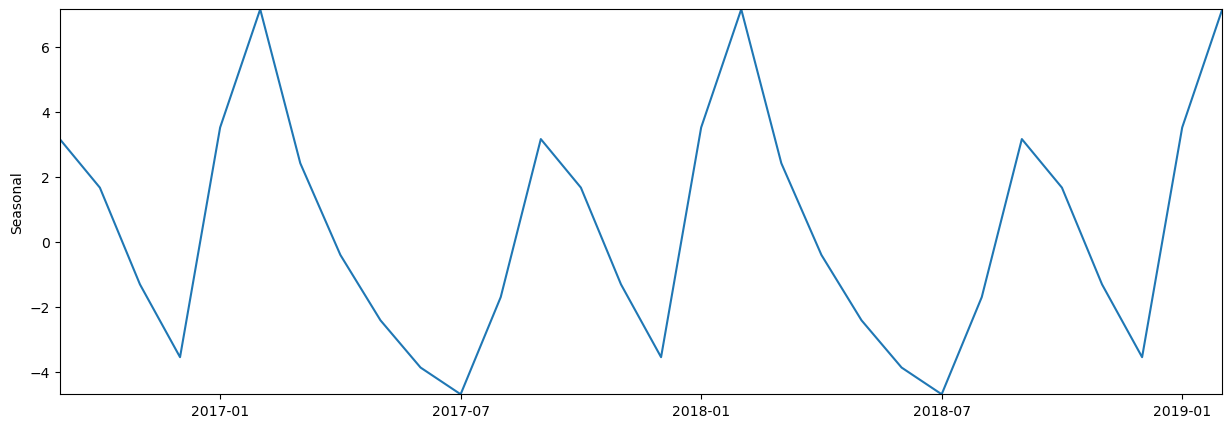

In [20]:
#來看看Sequence_Add.seasonal的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Add.seasonal[800:800+30])
plt.ylabel("Seasonal")
plt.xticks(Data_Arima.index[::6], rotation=0)
plt.margins(0)

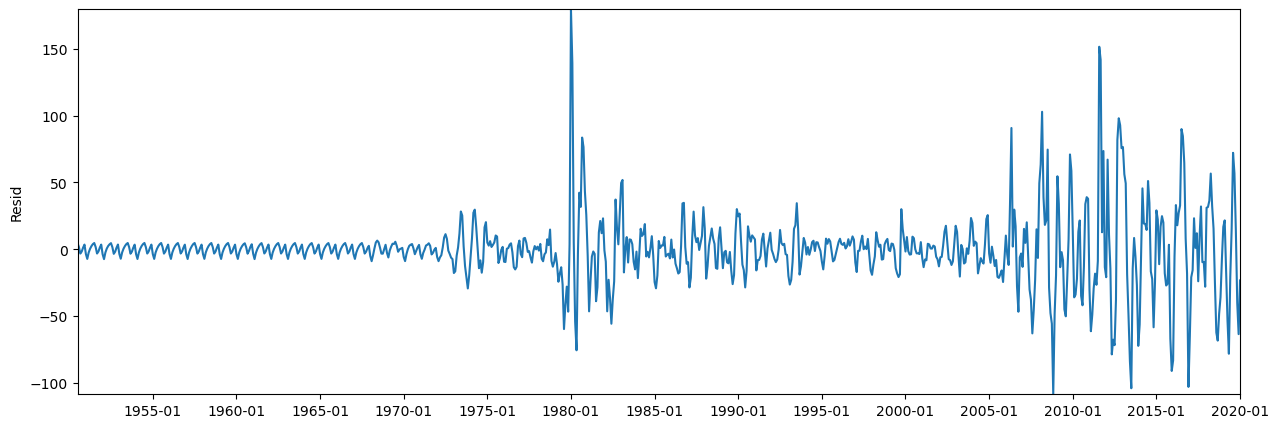

In [21]:
#來看看Sequence_Add.resid的曲線
plt.figure(figsize=(15,5))
plt.plot(Sequence_Add.resid);
plt.ylabel("Resid")
plt.xticks(Data_Arima.index[::60], rotation=0)
plt.margins(0)

## 2.資料分析

### 時間序列的資料再跑統計模型前，先做平穩性檢驗，來判斷資料是否平穩(stationary)，如果不平穩，要做差分處理。
### Dickey Fuller test是常用的檢定方式：
### 如果檢驗統計量小於臨界值，我們可以拒絕原假設(也就是序列是平穩的)。 
### 當檢驗統計量大於臨界值時，無法拒絕原假設(這意味著序列不是平穩的)。

In [22]:
#檢驗平穩性的函式
def adf_test(Data):
    print("Results of Dickey-Fuller Test\n")
    print("================================================")
    DF_test = adfuller(Data, autolag="AIC")    
    #進行平穩性檢驗，判斷序列是否存在單位根，如果序列平稳，就不存在單位根；如果序列不平稳，就會存在單位根
    #而有沒有單位根就是看你的當前值yt是否和上一個值y(t-1)有關，如果有的話，那就會出現單位根
    #如果不平穩，要做差分處理
    #如果檢驗統計量小於臨界值 Criterical Value，就表示序列是平穩的，臨界值有1%、5%、10%三種
    DF_output = pd.Series(DF_test[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in DF_test[4].items():
        DF_output["Criterical Value (%s)"%key] = value
    print(DF_output)
    print("================================================")
    
    if DF_output[0] < DF_output[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif DF_output[0] < DF_output[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif DF_output[0] < DF_output[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")
        


In [23]:
#做第一次Augmented Dickey-Fuller test，
adf_test(Data_Arima)

Results of Dickey-Fuller Test

Test Statistic                   0.814324
p-value                          0.991864
#Lags Used                      11.000000
Number of Observations Used    835.000000
Criterical Value (1%)           -3.438206
Criterical Value (5%)           -2.865008
Criterical Value (10%)          -2.568616
dtype: float64
The data is non-stationary, so do differencing!


#### 因為Test Statistic(0.814) > 10%臨界值、5%臨界值、1%臨界值，此時間序列不平穩，要做差分後再做一次平穩性分析

In [24]:
diff_1 = Data_Arima - Data_Arima.shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()

Date
1950-02    0.0
1950-03    0.0
1950-04    0.0
1950-05    0.0
1950-06    0.0
Name: Price, dtype: float64

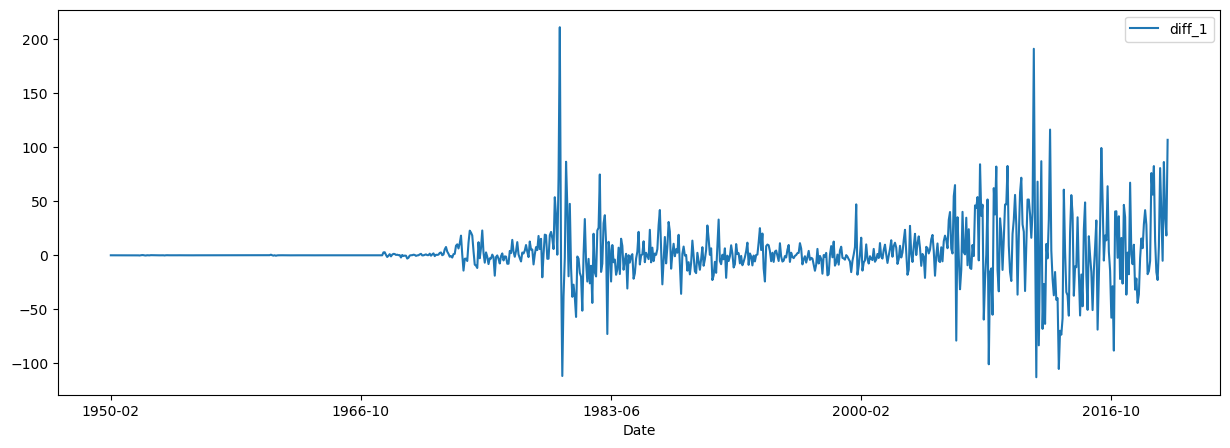

In [25]:
diff_1.plot(figsize=(15,5), label="diff_1")
plt.legend();

In [26]:
#做第二次Augmented Dickey-Fuller test，用差分來做
adf_test(diff_1)

Results of Dickey-Fuller Test

Test Statistic                -6.217087e+00
p-value                        5.333283e-08
#Lags Used                     1.000000e+01
Number of Observations Used    8.350000e+02
Criterical Value (1%)         -3.438206e+00
Criterical Value (5%)         -2.865008e+00
Criterical Value (10%)        -2.568616e+00
dtype: float64
The data is stationary. (Criterical Value 1%)


#### 因為Test Statistic(-6.217) < 1%臨界值，此時資料已平穩

## 3.找參數(p,d,q)

### 3-1用ACF圖與PACF圖找p跟q

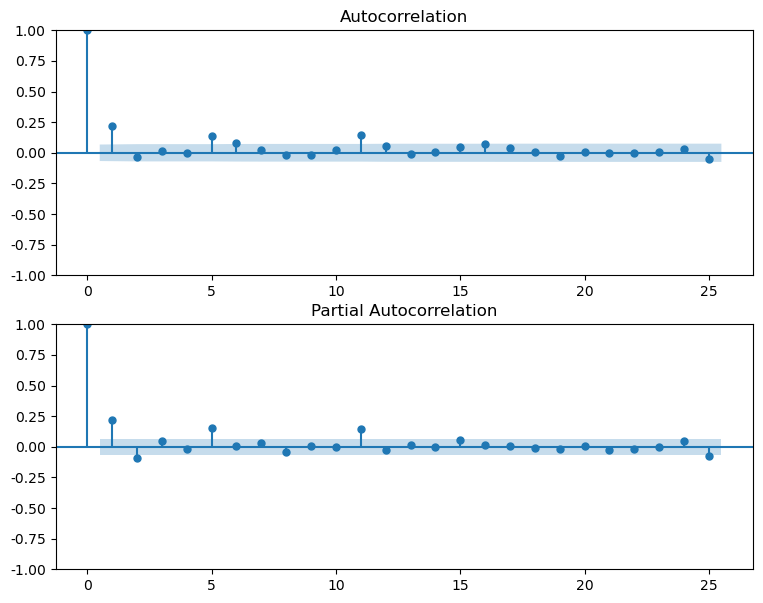

In [27]:
#畫ACF圖與PACF圖
#correlogram
f = plt.figure(facecolor="white", figsize=(9,7))
ax1 = f.add_subplot(211)
plot_acf(diff_1, lags=25, ax=ax1);
ax2 = f.add_subplot(212);
plot_pacf(diff_1, lags=25, ax=ax2);
plt.rcParams["axes.unicode_minus"] = False 
plt.show()
#畫ACF、PACF圖可幫助我們判斷模型ARIMA(p, d, q)參數的選擇。

#### 參數P：從ACF圖中，大概2階的時候衰減趨近於0或開始震盪，且從PACF圖中2階的時候已經落在置信區間內了，所以P=2

#### 參數Q：從PACF圖中，大概2or3階的時候衰減趨近於0或開始震盪，且從ACF圖中2階的時候已經落在置信區間內了，所以Q=2or3

### 3-2 用各種p跟q的組合找最佳的p跟q

In [28]:
#樣本內預測模型建立
#在這個部分，我選擇用透過尋找最小AIC方式來選擇p,d,q的值

In [29]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(0,1,0)：AIC=7849.768267032971
ARIMA(0,1,1)：AIC=7801.139775255675


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(0,1,2)：AIC=7800.3489009520345
ARIMA(1,1,0)：AIC=7808.235256877535


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(1,1,1)：AIC=7795.209282350579


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(1,1,2)：AIC=7790.587673713511
ARIMA(2,1,0)：AIC=7804.055509774253


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(2,1,1)：AIC=7790.3928641330385


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(2,1,2)：AIC=7786.994375426719


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(3,1,0)：AIC=7803.597972080743


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(3,1,1)：AIC=7792.368490439616


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

ARIMA(3,1,2)：AIC=7787.402041381374
This best model is ARIMA(2,1,2) based on argmin AIC.


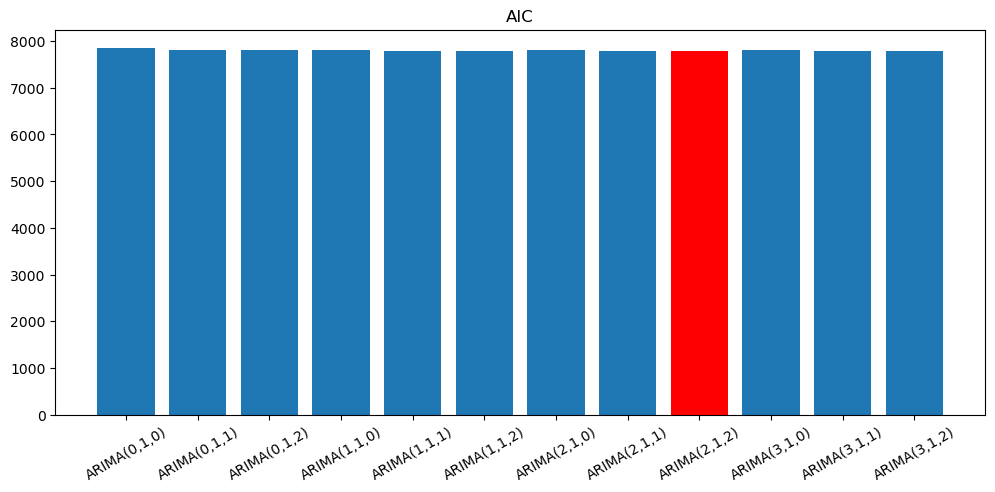

In [30]:
def arima_AIC(data, p=4, d=3, q=4):
    best_AIC =["pdq",10000]
    L =len(data)
    AIC = []
    name = []
    for i in range(p):
        for j in range(1,d):
            for k in range(q):            
                model = ARIMA(data, order=(i,j,k))
                model = ARIMA(data, order=(i,j,k))
                #fitted = model.fit(disp=-1)   dist=True會印出過程，而False則不會，但現在好像沒有這個參數了 
                fitted = model.fit()
                AIC.append(fitted.aic)
                name.append(f"ARIMA({i},{j},{k})")
                print(f"ARIMA({i},{j},{k})：AIC={fitted.aic}")
                if fitted.aic < best_AIC[1]:
                    best_AIC[0] = f"ARIMA({i},{j},{k})"
                    best_AIC[1] = fitted.aic
    print("==========================================================================")
    print(f"This best model is {best_AIC[0]} based on argmin AIC.")
    plt.figure(figsize=(12,5))
    plt.bar(name, AIC)
    plt.bar(best_AIC[0], best_AIC[1], color = "red")
    plt.xticks(rotation=30)
    plt.title("AIC")
    plt.savefig("Arima AIC")
    plt.show()
arima_AIC(Data_Arima, 4,2,3)

In [31]:
model = ARIMA(Data_Arima, order=(2, 1, 2)) #用最好的 p,d,q參數 
fitted = model.fit() 

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarnin

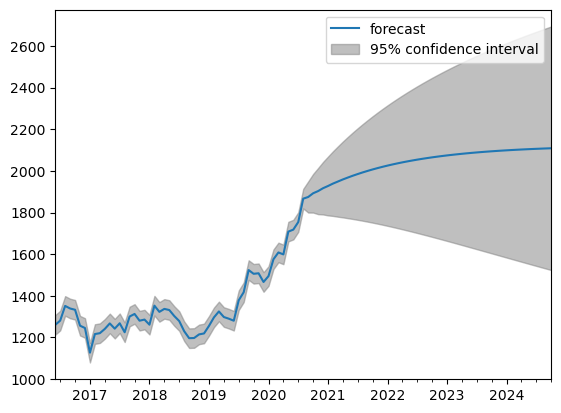

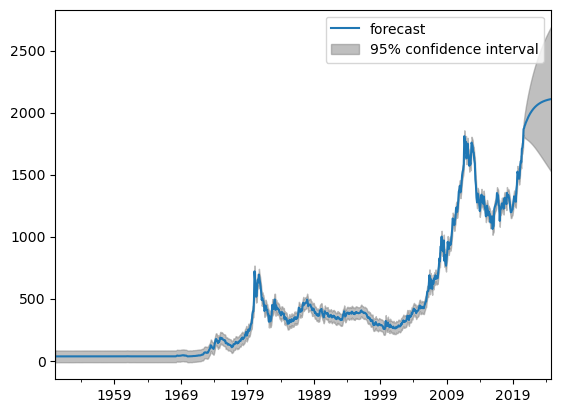

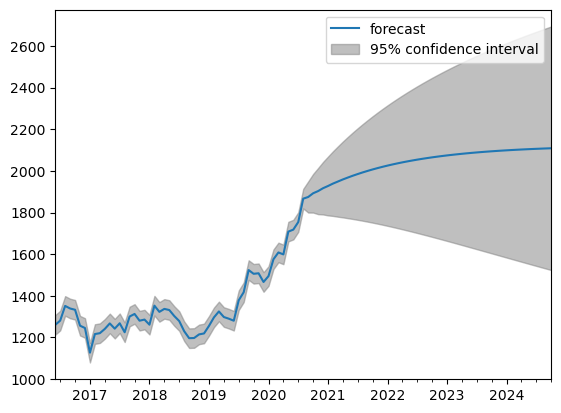

In [32]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(fitted, start = 1,end = len(Data_Arima)+50)
plot_predict(fitted, start = len(Data_Arima)-50,end = len(Data_Arima)+50)

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mod

1680.03
1680.03
1680.03
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,1,0)：MSE=10012.531540666667
1703.0468102180682
1703.0468102180682
1703.0468102180682
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,1,1)：MSE=6699.326392031692


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1702.5734325974638
1696.7525661587854
1696.7525661587854
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,1,2)：MSE=7437.888039401095


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mod

1702.9280373748354
1697.0676214287555
1700.3960988220863
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,1,3)：MSE=7081.544286424993
1766.2959999999905
1852.561999999981
1938.8279999999716
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,2,0)：MSE=8739.245380662995


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1694.7617459966405
1709.493491993281
1724.2252379899214
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,2,1)：MSE=4877.2434895851975


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1705.986503638307
1710.267523726299
1714.548543814291
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,2,2)：MSE=5533.413943517452


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1705.9480719840676
1704.375020726533
1709.1248393613191
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(0,2,3)：MSE=6104.923149186013
1698.9326396358938
1703.0745934207507
1703.982179952915
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,1,0)：MSE=6653.478727149252


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1700.026253785217
1689.5172372997165
1695.0402431926586
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,1,1)：MSE=7825.027925107093


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1704.7497265679435
1697.9907642833412
1703.2122826116404
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,1,2)：MSE=6783.7065735875085


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1707.9804350133202
1708.475983661585
1718.3087277734091
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,1,3)：MSE=5239.494014927651
1736.0033771895783
1802.0254074314396
1864.7141037194506
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,2,0)：MSE=1869.0006723185834


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1701.632319806746
1709.506657131532
1714.466568576724
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,2,1)：MSE=5587.07076132464


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1703.9060630568347
1698.5669104545987
1709.175388492813
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,2,2)：MSE=6241.226639480013


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1707.9126618092318
1705.620126501411
1715.3926913251778
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(1,2,3)：MSE=5532.1930990505525
1701.2234375392172
1698.1116922214972
1695.3499004106886
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,1,0)：MSE=7552.506780714463


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\s

1704.471221288323
1698.631076410029
1704.6977998331913
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,1,1)：MSE=6634.985956251632


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1706.6527408619572
1705.795038611098
1720.6849451295234
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,1,2)：MSE=5102.8108927134


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1708.6556308966472
1708.7110876795343
1721.4505344273427
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,1,3)：MSE=4978.898451195759
1740.611615205336
1780.9297479100117
1839.1932986038996
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,2,0)：MSE=940.9136140189166


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1704.8353332615463
1705.9697042629666
1707.9190934989658
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,2,1)：MSE=6188.221313532517


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1707.4417309248988
1705.696893867924
1716.1328200837754
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,2,2)：MSE=5471.559614933823


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1707.9075843631754
1705.670866280706
1715.4743448554657
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(2,2,3)：MSE=5524.434449128549
1703.026193419338
1699.4607981892352
1699.4215947802754
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,1,0)：MSE=7115.183381063631


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\s

1704.8502581947118
1698.0408466891208
1702.8586416258404
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,1,1)：MSE=6814.254834187787


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1708.0478800087296
1708.0856302874508
1721.3154047591772
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,1,2)：MSE=5003.32149036592


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\r

1708.9587823386357
1708.7173740743247
1721.4835112813325
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,1,3)：MSE=4974.776274334252
1747.4548661250483
1793.6444393926554
1838.7868035483666
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,2,0)：MSE=1522.0953949542363


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1706.020838194382
1706.4972056499262
1710.2709623278872
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,2,1)：MSE=5963.816712774868


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1708.148195257216
1705.32614541098
1714.2837363202507
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,2,2)：MSE=5629.715597635338


C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1707.922334022618
1704.9642922950432
1713.5307369097718
Date
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64
ARIMA(3,2,3)：MSE=5701.541402831216
This best model is ARIMA(2,2,0) based on argmin MSE.


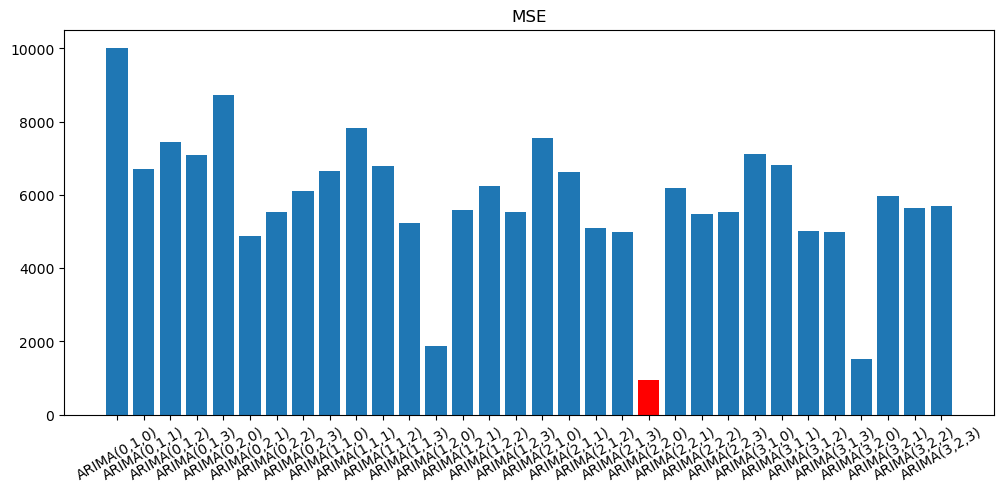

In [33]:
def arima_mse(data, p=4, d=3, q=4):
    period = 3 #預測三期
    best_pdq =["pdq",10000]
    L =len(data)
    train = data[:(L-period)]
    test = data[-period:]
    mse_r = []
    name = []
    for i in range(p):
        for j in range(1,d):
            for k in range(q):            
                model = ARIMA(train, order=(i,j,k))
                fitted = model.fit()
                fc, se, conf = fitted.forecast(period,alpha=0.05) # 95% conf
                print(fc)
                print(se)
                print(conf)
                print(test)
                mse = mean_squared_error(test,np.array([fc,se,conf]))
                mse_r.append(mse)
                name.append(f"ARIMA({i},{j},{k})")
                print(f"ARIMA({i},{j},{k})：MSE={mse}")
                if mse < best_pdq[1]:
                    best_pdq[0] = f"ARIMA({i},{j},{k})"
                    best_pdq[1] = mse
    print("==========================================================================")
    print(f"This best model is {best_pdq[0]} based on argmin MSE.")
    plt.figure(figsize=(12,5))
    plt.bar(name, mse_r)
    plt.bar(best_pdq[0], best_pdq[1], color = "red")
    plt.xticks(rotation=30)
    plt.title("MSE")
    plt.savefig("Arima MSE")
    plt.show()
#arima_mse(Data_Arima, 3,2,3)
arima_mse(Data_Arima, 4,3,4)

In [34]:
#拆解資料
period = 10
title = f'ARIMA(2,1,2) for Forecasting {period} Periods'
L = len(Data_Arima)
x_train = Data_Arima[:(L-period)]
x_test = Data_Arima[-period:]
#建立模型並訓練
model = ARIMA(x_train, order=(2, 1, 2)) 
fitted = model.fit()
#ARIMA.fit().forecast
#F預測未來的數值
fc = fitted.forecast(period, alpha=0.05) # 95% conf
#轉成pandas
fc_series = pd.Series(fc, index=x_test.index)

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarnin

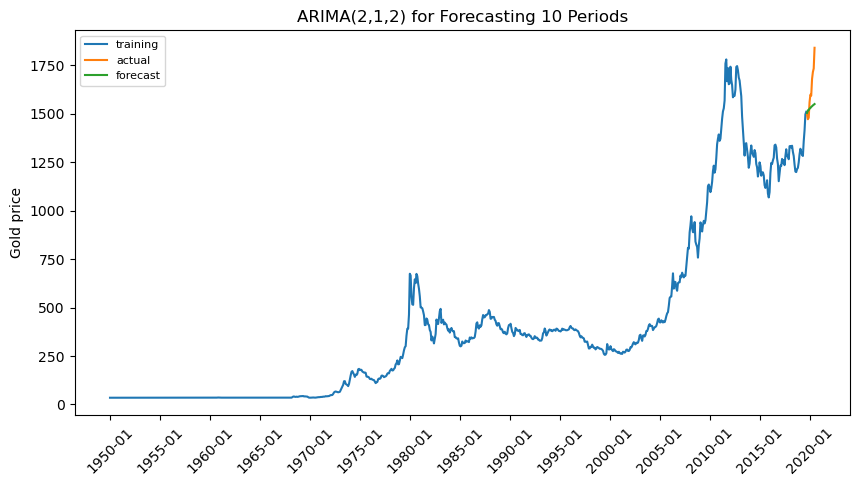

In [35]:
#視覺化呈現
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x_train, label='training')
plt.plot(x_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.xticks(Data_Arima.index[::60], rotation=45)
plt.title(title)
plt.ylabel('Gold price')
plt.legend(loc='upper left', fontsize=8)
plt.savefig(title)
plt.show()


In [36]:
#結果
print(f'Mean Absolute Error : {mean_absolute_error(fc_series,x_test)}')
print(f'Mean Squared Error : {mean_squared_error(fc_series,x_test)}')
print('===========================') 
print('fc_series:',fc_series)
print('===========================')
print('Gold price:',x_test)

Mean Absolute Error : 104.5615107208409
Mean Squared Error : 18184.832187293323
fc_series: Date
2019-10    1504.252652
2019-11    1518.142159
2019-12    1518.799764
2020-01    1527.100655
2020-02    1529.997915
2020-03    1535.717177
2020-04    1539.139059
2020-05    1543.511322
2020-06    1546.831317
2020-07    1550.387022
Name: predicted_mean, dtype: float64
Gold price: Date
2019-10    1494.765
2019-11    1471.921
2019-12    1480.025
2020-01    1560.668
2020-02    1598.818
2020-03    1593.764
2020-04    1680.030
2020-05    1715.697
2020-06    1734.032
2020-07    1840.807
Name: Price, dtype: float64


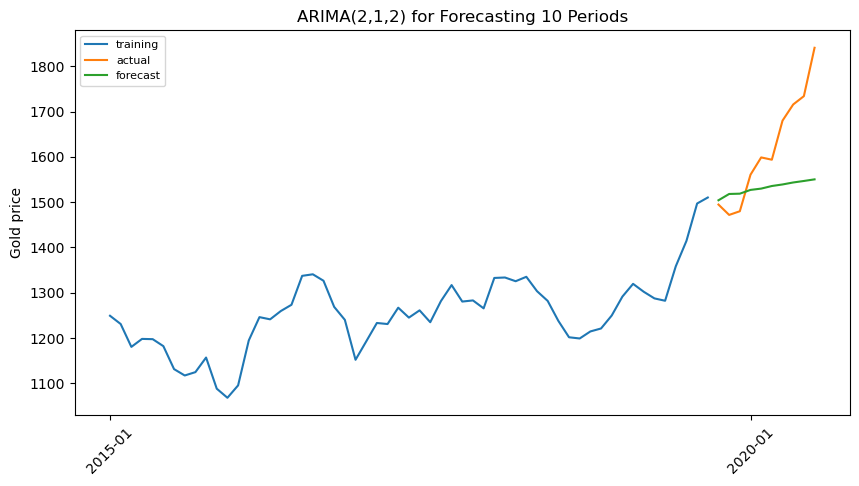

In [37]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(x_train[13*60::], label='training')
plt.plot(x_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.xticks(Data_Arima.index[13*60::60], rotation=45)
plt.title(title)
plt.ylabel('Gold price')
plt.legend(loc='upper left', fontsize=8)
plt.savefig(title)
plt.show()

In [38]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  837
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3828.578
Date:                Sat, 23 Dec 2023   AIC                           7667.157
Time:                        22:13:16   BIC                           7690.800
Sample:                    01-01-1950   HQIC                          7676.220
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3028      0.056      5.448      0.000       0.194       0.412
ar.L2          0.5833      0.042     13.902      0.000       0.501       0.666
ma.L1         -0.0807      0.055     -1.473      0.141      -0.188       0.027
ma.L2         -0.7291      0.039    -18.529      0.000      -0.806      -0.652
sigma2       556.2294     10.225     54.399      0.000     536.189     576.270
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):              6520.79
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):            1100.18   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""